In [7]:
import numpy as np
import os
import pickle
import math
import cv2

from tensorflow.keras.utils import plot_model
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras.utils import Sequence
from gensim.models.fasttext import load_facebook_model

from dev.crop import crop
from dev.preprocessing import getFrames2
from dev.preprocessing import faceMesh_2
from dev.preprocessing import handPose_2
from dev.preprocessing import points_to_displacement

In [8]:
ko_model = load_facebook_model("../ko.bin")

In [9]:
model = keras.models.load_model("final_model.h5")

In [27]:
test_X_file = "../dataset/glad.mp4"
test_X = []
vid = getFrames2(test_X_file)
tmp = points_to_displacement(faceMesh_2(vid), 128, handPose_2(vid), 21)
face = np.array([tmp[j]['face'] for j in range(len(tmp))])
hands_l = np.array([tmp[j]['hands']['left'] for j in range(len(tmp))])
hands_r = np.array([tmp[j]['hands']['right'] for j in range(len(tmp))])
hands = np.concatenate((hands_l, hands_r), axis=1)
print(hands, face)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 ...

 [[ 1.34110451e-04 -1.11460686e-03

In [29]:
test_y = model.predict([np.array([face[45:55].reshape(10, 128*3)]), np.array([hands[45:55].reshape(10, 42*3)])])
print(ko_model.wv.similar_by_vector(test_y[0])[0])

1/1 [==============================] - 0s 12ms/step
('날', 0.8635671734809875)


In [30]:
for i in range(91):
    test_y = model.predict([np.array([face[i:i+10].reshape(10, 128*3)]), np.array([hands[i:i+10].reshape(10, 42*3)])])
    print(ko_model.wv.similar_by_vector(test_y[0])[0])

1/1 [==============================] - 0s 11ms/step
('안녕', 0.762115478515625)
1/1 [==============================] - 0s 23ms/step
('안녕', 0.8189926743507385)
1/1 [==============================] - 0s 18ms/step
('안녕', 0.8164384961128235)
1/1 [==============================] - 0s 18ms/step
('안녕', 0.8371672630310059)
1/1 [==============================] - 0s 26ms/step
('기쁨', 0.8368268609046936)
1/1 [==============================] - 0s 19ms/step
('기쁨', 0.8384145498275757)
1/1 [==============================] - 0s 16ms/step
('기쁨', 0.7325984239578247)
1/1 [==============================] - 0s 17ms/step
('기쁨', 0.8697659969329834)
1/1 [==============================] - 0s 19ms/step
('보다', 0.9608057141304016)
1/1 [==============================] - 0s 18ms/step
('보다', 0.7861634492874146)
1/1 [==============================] - 0s 14ms/step
('날', 0.8430209755897522)
1/1 [==============================] - 0s 17ms/step
('날', 0.7849288582801819)
1/1 [==============================] - 0s 16ms/step
('날

In [5]:
for i in range(70, 85):
    test_y = model.predict([np.array([face[i:i+10].reshape(10, 128*3)]), np.array([hands[i:i+10].reshape(10, 42*3)])])
    print(ko_model.wv.similar_by_vector(test_y[0])[0])

2022-12-27 03:33:59.222636: E tensorflow/stream_executor/cuda/cuda_dnn.cc:389] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2022-12-27 03:33:59.222790: E tensorflow/stream_executor/cuda/cuda_dnn.cc:398] Possibly insufficient driver version: 515.65.1
2022-12-27 03:33:59.222815: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at cudnn_rnn_ops.cc:1553 : UNKNOWN: Fail to find the dnn implementation.
2022-12-27 03:33:59.223566: E tensorflow/stream_executor/cuda/cuda_dnn.cc:389] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-12-27 03:33:59.223583: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at cudnn_rnn_ops.cc:1553 : UNKNOWN: Fail to find the dnn implementation.


UnknownError: Graph execution error:

Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[model_1/gru_2/PartitionedCall]] [Op:__inference_predict_function_3438]

In [20]:
from dev.crop import crop
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [21]:
model_q = keras.models.load_model("./discriminator.h5")

In [22]:
img = cv2.imread("./faces/q.jpg", cv2.IMREAD_COLOR)
img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

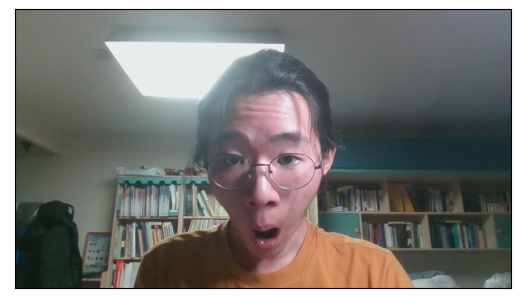

In [23]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img)

In [24]:
img2 = crop(img)
img2.shape

(720, 1280, 3)
(337, 337, 3)


(337, 337, 3)

True

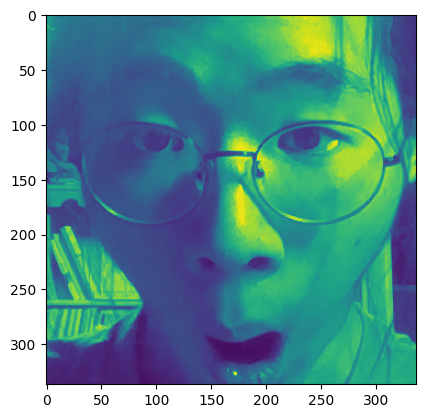

In [29]:
a=cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(a)
a = cv2.resize(a, (50, 50))
cv2.imwrite("../arst.png", a)

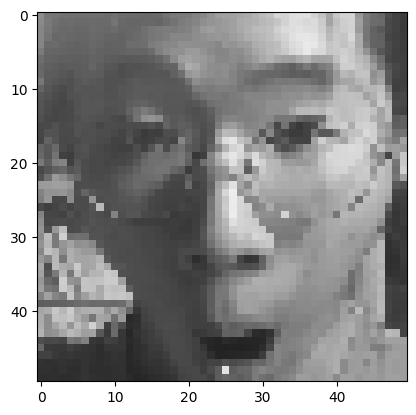

In [33]:
k = cv2.imread("../arst.png")
plt.imshow(k)

In [34]:
model_q.predict(np.array([k]))

2022-12-25 18:50:54.536924: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops.cc:1130 : NOT_FOUND: No algorithm worked!  Error messages:


NotFoundError: Graph execution error:

Detected at node 'sequential_2/conv2d_2/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/q/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/q/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/home/q/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/q/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/q/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/q/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/q/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/q/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/q/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/q/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/home/q/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/home/q/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/q/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/q/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/q/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_2799494/190686618.py", line 1, in <module>
      model_q.predict(np.array([k]))
    File "/home/q/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/home/q/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/q/.local/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/q/.local/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_2/conv2d_2/Conv2D'
No algorithm worked!  Error messages:
	 [[{{node sequential_2/conv2d_2/Conv2D}}]] [Op:__inference_predict_function_796]

In [117]:
cap = cv2.VideoCapture(f"../{k}.mp4")
i = 0
if cap.isOpened():
    while True:
        i += 1
        ret, img = cap.read()
        if ret:
            h, w, c = img.shape
            with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
                result = face_detection.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                box = result.detections[0].location_data.relative_bounding_box
                x1 = round(box.xmin*w)
                x2 = round((box.xmin+box.width)*w)
                y1 = round(box.ymin*h)
                y2 = round((box.ymin+box.height)*h)
                roi_img = img[y1:y2, x1:x2]
                if not result.detections:
                    continue
                cv2.imwrite(f"./faces/{k}_{i}.png", roi_img)
        else:
            break
cap.release()